In [13]:
using Interact, PyPlot, NNlib,  ImageFiltering, Images, ImageFiltering, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib ~/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42


In [ ]:
# using Interact, Plots, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils

In [57]:
img = convert(Array{Float64,2}, load("../input_img/Iine_100_100_gs.png"));

In [2]:
Kernel.gaussian((10,10), (11,11))

11×11 OffsetArray(::Array{Float64,2}, -5:5, -5:5) with eltype Float64 with indices -5:5×-5:5:
 0.00709955  0.00742633  0.00769085  …  0.00769085  0.00742633  0.00709955
 0.00742633  0.00776814  0.00804484     0.00804484  0.00776814  0.00742633
 0.00769085  0.00804484  0.0083314      0.0083314   0.00804484  0.00769085
 0.00788554  0.0082485   0.00854231     0.00854231  0.0082485   0.00788554
 0.00800472  0.00837316  0.00867141     0.00867141  0.00837316  0.00800472
 0.00804484  0.00841513  0.00871487  …  0.00871487  0.00841513  0.00804484
 0.00800472  0.00837316  0.00867141     0.00867141  0.00837316  0.00800472
 0.00788554  0.0082485   0.00854231     0.00854231  0.0082485   0.00788554
 0.00769085  0.00804484  0.0083314      0.0083314   0.00804484  0.00769085
 0.00742633  0.00776814  0.00804484     0.00804484  0.00776814  0.00742633
 0.00709955  0.00742633  0.00769085  …  0.00769085  0.00742633  0.00709955

In [ ]:
x=-12:.5:12
y=-12:.5:12
# δ = σ_2/2
K = 2;



In [ ]:
σ_a = 0.4
σ_b = 0.01
G(x,y) = 1/(2*π*σ_a*σ_a)*exp((-x^2/√2*σ_a)-(y^2/√2*σ_b)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 

In [ ]:
@manipulate for σ_a = 0.01:0.01:1, σ_b = 0.01:0.01:5
G(x,y) = 1/(2*π*σ_a*σ_a)*exp(-0.5*((x^2/σ_a)+(y^2/σ_b))) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 
end

In [ ]:
peak = 0.8
@manipulate for σ_a = 0.01:0.01:1
    σ_b = 1/(peak*2*π*σ_a)
G(x,y) = 1/(2*π*σ_a*σ_a)*exp(-0.5*((x^2/σ_a)+(y^2/σ_b))) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 
end

In [ ]:
1/(0.44*0.06*2*pi)

In [ ]:
σ_a = 0.4
σ_b = 0.01

In [9]:
kern = 5 .* Kernel.gaussian((3,0.4),(19,19))
Utils.plot_rb(kern, "img", false, 0, 1, true,  "./")

UndefVarError: UndefVarError: Utils not defined

In [8]:
kern_small = 5 .* Kernel.gaussian((3,0.4),(19,3))
Utils.plot_rb(kern_small, "img", false,0, 1, true,  "./")

UndefVarError: UndefVarError: Utils not defined

In [76]:
findmax(kern_small)

(0.6733023010647149, CartesianIndex(0, 0))

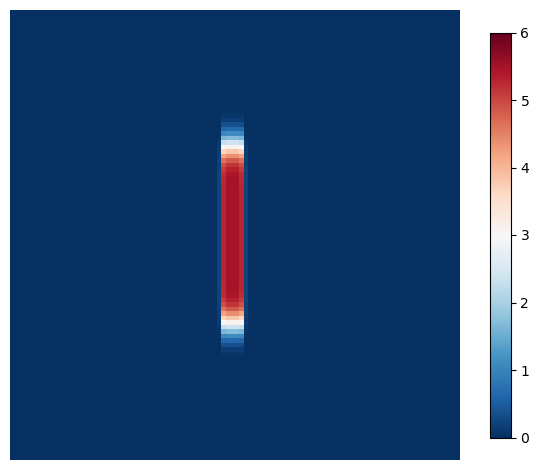

In [68]:
img_a = imfilter(img, kern, "circular")
Utils.plot_rb(img_a, "img", false, 0, 6, true,  "./")

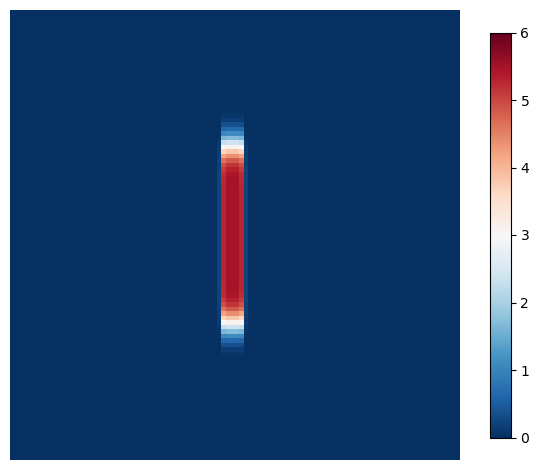

In [69]:
img_as = imfilter(img, kern_small, "circular")
Utils.plot_rb(img_a, "img", false, 0, 6, true,  "./")

In [73]:
findmax(img_a .- img_as)


(1.8840838072348687e-5, CartesianIndex(40, 46))

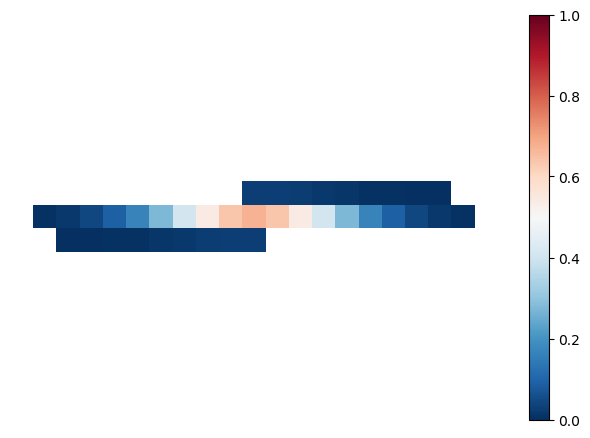

In [104]:
kern_r = imrotate(kern_small, -π/2)
Utils.plot_rb(kern_r, "img", false, 0, 1, true,  "./")

In [105]:
size(kern_r)

(5, 21)

In [103]:
size(kern_small)

(19, 3)

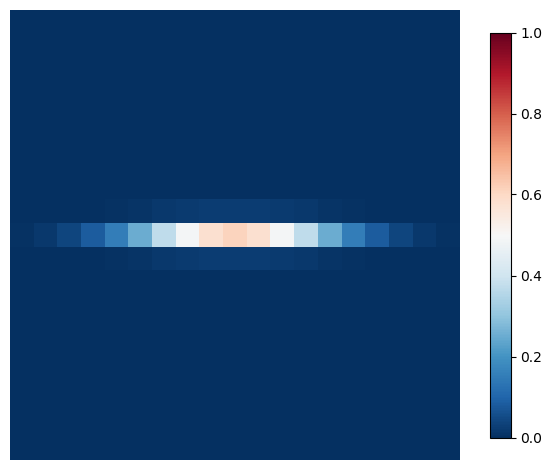

In [14]:
kern_ort = 5 .* Kernel.gaussian((0.4,3),(19,19))
Utils.plot_rb(kern_ort, "img", false, 0, 1, true,  "./")

In [99]:
findmax((kern_r-kern_ort))

DimensionMismatch: DimensionMismatch("dimensions must match: a has dims (-10:10, -10:10), b has dims (-9:9, -9:9), mismatch at 1")

In [97]:
kern_r[:,,9]

BoundsError: BoundsError: attempt to access 21×21 OffsetArray(::Array{Float64,2}, -10:10, -10:10) with eltype Float64 with indices -10:10×-10:10 at index [-9:9, -9, 9]

In [ ]:
function gaussian_x(σ::Real, θ, l = 4*ceil(Int,σ)+1)
    isodd(l) || throw(ArgumentError("length must be odd"))
    w = l>>1
    g = σ == 0 ? [exp(0/(2*oftype(σ, 1)^2))] : [exp(-x^2/(2*σ^2)) for x=-w:w]
    centered(g/sum(g))
end
function gaussian_y(σ::Real, θ, l = 4*ceil(Int,σ)+1)
    isodd(l) || throw(ArgumentError("length must be odd"))
    w = l>>1
    g = σ == 0 ? [exp(0/(2*oftype(σ, 1)^2))] : [exp(-x^2/(2*σ^2)) for x=-w:w]
    centered(g/sum(g))
end

In [112]:
3>>1

1

In [141]:
for x=-3:3
    mm[x] = exp(-x^2/(2*2^2)) 
end

MethodError: MethodError: no method matching setindex!(::Measures.Length{:mm,Float64}, ::Float64, ::Int64)

In [16]:
using OffsetArrays
function gaussian_rot(σ_x::Real, σ_y::Real, θ, l = 4*ceil(Int, max(σ_a,σ_b))+1)
    isodd(l) || throw(ArgumentError("length must be odd"))
    w = l>>1
    g = OffsetArray(Array{Real}(undef, l, l), -w:w, -w:w)
    for x ∈ -w:w, y ∈ -w:w
        g[x,y] = exp(-1/2*(((x*cos(θ)-y*sin(θ))^2/σ_x)+((x*sin(θ)+y*cos(θ))^2)/σ_y))
    end
    centered(g/sum(g))
end

gaussian_rot (generic function with 2 methods)

In [211]:
(x*cos(θ)-y*sin(θ)), (x*sin(θ)+y*cos(θ))

UndefVarError: UndefVarError: x not defined

In [18]:
using OffsetArrays
function gaussian_rot(σ_x::Real, σ_y::Real, θ, l = 4*ceil(Int, max(σ_a,σ_b))+1)
    isodd(l) || throw(ArgumentError("length must be odd"))
    w = l>>1
    g = OffsetArray(fill(0.0, l, l), -w:w, -w:w)
    #todo add when σ_x or/and σ_y == 0
    for x ∈ -w:w, y ∈ -w:w
        g[x,y] = exp(-1/2*((((x*cos(θ)-y*sin(θ))/σ_x)^2)+(((x*sin(θ)+y*cos(θ))/σ_y)^2)))
    end
    centered(g/sum(g))
end

gaussian_rot (generic function with 2 methods)

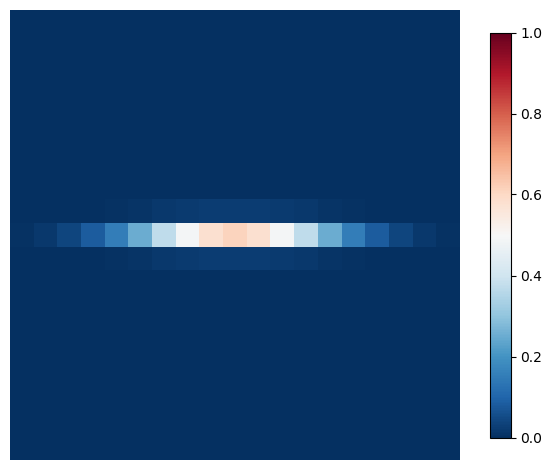

In [21]:
k_c = 5 .* gaussian_rot(0.4,3,0,19)
Utils.plot_rb(k_c, "img", false, 0, 1, true,  "./")

In [6]:
k_c = 5 .* gaussian_rot(0.4,3.0,0,19)
Utils.plot_rb(k_c, "img", false, 0, 1, true,  "./")

UndefVarError: UndefVarError: gaussian_rot not defined

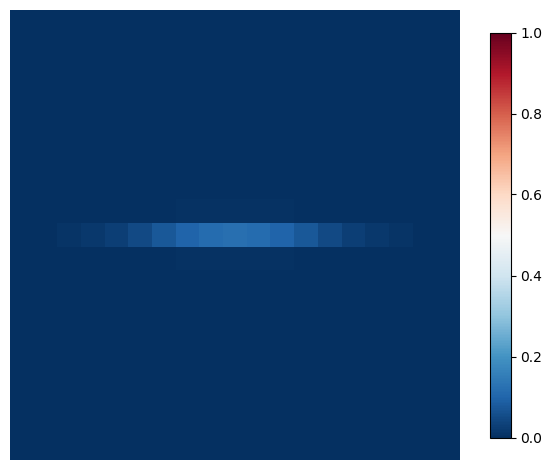

In [199]:
k_k = Kernel.gaussian((0.4,3.0), (19,19))
Utils.plot_rb(k_k, "img", false, 0, 1, true,  "./")

In [133]:
g

2×3 Array{Int64,2}:
 1  7  3
 1  2  3

In [165]:
oftype(1, 1.0)

1

In [232]:
fill(4,3,3)

3×3 Array{Int64,2}:
 4  4  4
 4  4  4
 4  4  4

In [166]:
x*cos(0)-y*sin(0))^2/σ_x)+((x*sin(0)+y*cos(0)

LoadError: syntax: extra token ")" after end of expression

In [241]:
using BenchmarkTools

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:804
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:804
┌ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]
└ @ Base loading.jl:1260


In [242]:
@benchmark sin(x) setup=(x=rand())

┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:804
┌ Warning: Due to a previously reported error, the running code does not match saved version for the following files:
│ 
│   /Users/niallcullinane/.julia/dev/MEngProject/src/Laminart.jl
│ 
│ Use Revise.errors() to report errors again.
└ @ Revise /Users/niallcullinane/.julia/packages/Revise/tV8FE/src/Revise.jl:804


BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     6.215 ns (0.00% GC)
  median time:      6.884 ns (0.00% GC)
  mean time:        8.816 ns (0.00% GC)
  maximum time:     54.943 ns (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1000

In [250]:
d = Dict(σ => 1)

Dict{typeof(σ),Int64} with 1 entry:
  σ => 1

In [256]:
d[σ]=2

UndefVarError: UndefVarError: σ₁ not defined

In [254]:
d[σ]

2

In [3]:
function dict_performance()
    n = 1000
    xa = Dict{Int,Int}()
    sizehint!(xa, n)
    for i in 1:n
        xa[i] = i
    end
    return xa
end
function array_p()
    n = 1000
    xa = fill(1,n)
    sizehint!(xa, n)
    for i in 1:n
        xa[i] = i
    end
    return xa
end

function dict_performance2()
    n = 1000
    xa = Dict{Int,Int}()
    sizehint!(xa, n)
    for i in 1:n
        get!(xa, i, i)
    end
    return xa
end
d_1a = dict_performance()
d_2a = dict_performance2()
a_1a = array_p()
function test(da)
    for i in 1:1000
        a = da[i]
    end
end
using BenchmarkTools
@btime test(d_1a)
@btime test(d_2a)
@btime test(a_1a)

  7.634 μs (0 allocations: 0 bytes)
  7.648 μs (0 allocations: 0 bytes)
  685.106 ns (0 allocations: 0 bytes)


In [4]:
@btime test(d_1a)
@btime test(d_2a)
@btime test(a_1a)

  7.635 μs (0 allocations: 0 bytes)
  7.657 μs (0 allocations: 0 bytes)
  684.364 ns (0 allocations: 0 bytes)


In [46]:
kernels.H

19×19×2 Array{Real,3}:
[:, :, 1] =
 5.97273e-5   0.0001016    0.000162356  …  0.0001016    5.97273e-5
 0.000153582  0.000261251  0.000417479     0.000261251  0.000153582
 0.000353388  0.000601133  0.000960608     0.000601133  0.000353388
 0.000727627  0.00123774   0.0019779       0.00123774   0.000727627
 0.00134064   0.0022805    0.00364423      0.0022805    0.00134064
 0.00221034   0.00375991   0.00600832   …  0.00375991   0.00221034
 0.003261     0.00554715   0.00886431      0.00554715   0.003261
 0.00430515   0.0073233    0.0117026       0.0073233    0.00430515
 0.00508593   0.00865146   0.013825        0.00865146   0.00508593
 0.00537648   0.0091457    0.0146148       0.0091457    0.00537648
 0.00508593   0.00865146   0.013825     …  0.00865146   0.00508593
 0.00430515   0.0073233    0.0117026       0.0073233    0.00430515
 0.003261     0.00554715   0.00886431      0.00554715   0.003261
 0.00221034   0.00375991   0.00600832      0.00375991   0.00221034
 0.00134064   0.0022805    0

In [41]:
kernels = Laminart.kernels(Parameters.parameters)

(gauss_1 = [0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; … ; 0.013306209891013651 0.059634295436180124 … 0.059634295436180124 0.013306209891013651; 0.002969016743950497 0.013306209891013651 … 0.013306209891013651 0.002969016743950497… ; ], C_A = Real[0.12495048312055823 0.04048734729132247 … -0.04048734729132247 -0.12495048312055823; 0.12495048312055823 0.04048734729132247 … -0.04048734729132247 -0.12495048312055823; … ; 0.12495048312055823 0.04048734729132247 … -0.04048734729132247 -0.12495048312055823; 0.12495048312055823 0.04048734729132247 … -0.04048734729132247 -0.12495048312055823]

Real[0.12495048312055826 0.12495048312055823 … 0.12495048312055823 0.12495048312055823; 0.04048734729132248 0.04048734729132247 … 0.040487347291322466 0.040487347291322466; … ; -0.040487347291322466 -0.040487347291322466 … -0.04048734729132247 -0.04048734729132248; -0.124950

In [39]:
Parameters.parameters.C_AB_l

5

In [35]:
parameters = (K = 2,
δ_v = 1.25,
δ_c = 0.25,
δ_m = 0.01875,
δ_z = 0.125,
δ_s = 2.5,
σ_1 = 1,
C_1 = 1.5,
C_2 = 0.075,
σ_2 = 0.5,
γ = 10,
α = 0.5,
ϕ = 2.0,
Γ = 0.2,
V_21 = 0, #1.0
μ = 2,
ν = 1.1,
n = 6,
att = 0,# p25
η_p = 2.1,
η_m = 1.5,
λ = 1.5,
a_23_ex = 3,
a_23_in = 0.5,
v12_6 = 1,
v12_4 = 5,
ψ = 0.5,
C_AB_l =  4*ceil(σ_2)+1,
H_σ_x = 3,
H_σ_y = 4,
H_fact = 5,
# H_l =  4*ceil(Int, max(H_σ_x,H_σ_y))+1,
H_l = 19)

UndefVarError: UndefVarError: σ_2 not defined

In [36]:
test = (σ_2 = 0.5, b = σ_2)

UndefVarError: UndefVarError: σ_2 not defined

In [37]:
test = (c = 0.5, b = c)

UndefVarError: UndefVarError: c not defined

In [38]:
kkdf = (a = 2, b = 2*a)

UndefVarError: UndefVarError: a not defined

In [ ]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 


In [ ]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 

In [ ]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
             
Plots.wireframe(x,y,G) 

In [ ]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1
θ=π/4
@manipulate for θ in 0:2π
    G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp(-((x*cos(θ)-y*sin(θ))^2/2*σ_a1)-((x*sin(θ)+y*cos(θ))^2/2*σ_a2)) 

             
Plots.wireframe(x,y,G) 
end

In [ ]:
    G(x,y) = 1/(2*π*σ_2^2)*exp(-/(2*σ_2^2)*(x^2+y^2))
Plots.wireframe(x,y,G) 

In [ ]:
cos(pi/2)

In [ ]:
sin(pi/2)

In [ ]:
R(x,y,θ)=((x*cos(θ)-y*sin(θ)), (x*sin(θ)+y*cos(θ))) 

In [ ]:
(x*cos(θ)-y*sin(θ))
(x*sin(θ)+y*cos(θ))

In [ ]:
R(2,2,π/4)

In [ ]:
√(2)+√2

In [200]:
function fun_R(x,y,θ)
    (x*cos(θ)-y*sin(θ)), (x*sin(θ)+y*cos(θ))
end

fun_R (generic function with 1 method)

In [209]:
a = fun_R(-√2,-√2,pi/4)

(-2.220446049250313e-16, -2.0)

In [ ]:
type(a) 

In [ ]:
G(fun_R(x,y,pi))

In [ ]:
fun_R(x,y,pi)

In [ ]:
fun_R(G(x,y),pi)

In [62]:
σ_a1=1
σ_a2=.1
σ_b1=1
σ_b2=0.1

θ=π/2
G(x,y) = 1/(2*π*σ_a1*σ_a2)*exp((-x^2/2*σ_a1)-(y^2/2*σ_a2)) 
# -  1/(2*π*σ_2^2)*exp(-1/((((2*σ_b1^2)*x^2))+((2*σ_b2^2)*y^2))) 
xr = x*cos(θ)-y*sin(θ)
yr = x*sin(θ)+y*cos(θ)
Plots.wireframe(xr,yr,G) 

UndefVarError: UndefVarError: x not defined

In [ ]:
function fun_R(x,y,θ)
    x*cos(θ)-y*sin(θ), x*sin(θ)+y*cos(θ)
end

In [ ]:
fun_R(1,0,pi)

In [ ]:
G(1,0)

In [ ]:
G(fun_R(1,0,pi))

In [ ]:
θ=pi
G(x*cos(θ)-y*sin(θ), x*cos(θ)-y*sin(θ))

In [ ]:
G(x,y)

In [ ]:
using ModelingToolkit, OrdinaryDiffEq

@parameters t σ ρ β
@variables x(t) y(t) z(t)
@derivatives D'~t

eqs = [D(D(x)) ~ σ*(y-x),
       D(y) ~ x*(ρ-z)-y,
       D(z) ~ x*y - β*z]

sys = ODESystem(eqs)
sys = ode_order_lowering(sys)

u0 = [D(x) => 2.0,
      x => 1.0,
      y => 0.0,
      z => 0.0]

p  = [σ => 28.0,
      ρ => 10.0,
      β => 8/3]

tspan = (0.0,100.0)
prob = ODEProblem(sys,u0,tspan,p,jac=true)
sol = solve(prob,Tsit5())
using Plots; plot(sol,vars=(x,y))